In [1]:
from latools import *

In [3]:
%matplotlib inline

In [4]:
d = analyse('latools/resources/test_data/')

4 Analysis Files Loaded:
1 standards, 3 samples
Analytes: Mg24 Mg25 Al27 Ca43 Ca44 Mn55 Sr88 Ba137 Ba138


In [5]:
d.despike()

Exponential Decay Coefficient not provided.
Coefficient will be determined from the washout
times of the standards (takes a while...).
-------------------------------------
Exponential Decay Coefficient: -2.77
-------------------------------------


In [6]:
d.autorange()

In [7]:
d.bkgcorrect()

In [8]:
d.ratio()

SRM range files already exist. Do you want to overwrite them (old files will be lost)? [Y/n]: 
SRM range files already exist in 'latools/resources/test_data//params/test_data.calibdat'. Do you want to overwrite them (old files will be lost)? [Y/n]: 


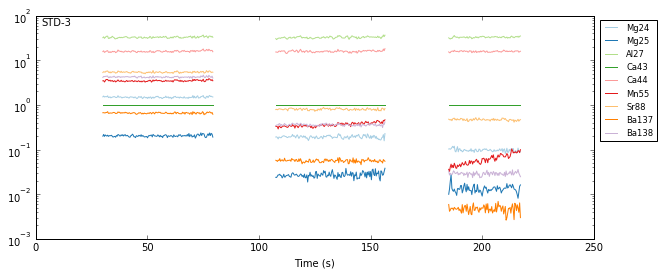

In [9]:
d.calibrate()

In [12]:
d.calib_dict

{'Al27': array([ 0.00287096]),
 'Ba137': array([ 0.00246144]),
 'Ba138': array([ 0.00038369]),
 'Ca43': array([ 1.]),
 'Ca44': array([ 0.06319928]),
 'Mg24': array([ 0.00630822]),
 'Mg25': array([ 0.04583863]),
 'Mn55': array([ 0.00114538]),
 'Sr88': array([ 0.00053502])}

In [136]:
class filt(object):
    def __init__(self, size):
        self.size = size
        self.components = {}
        self.info = {}
    
    def get_filtnames(self):
        return dict(zip(self.components.keys(), [True] * len(self.components.keys())))
    
    def make_filt(self, active):
        filt = np.array([True] * self.size)
        for k, v in active.items():
            if v:
                filt = filt & self.components[k]
        return filt
    
    def add_filt(self, name, filt, info=''):
        self.components[name] = filt
        self.info[name] = info
        
    def filt_info(self):
        out = ''
        for k in self.components.keys():
            out += '{:s}: {:s}'.format(k, self.info[k]) + '\n'
        return(out)

In [137]:
f2 = np.array([True] * 100)
f2[30:50] = False

In [138]:
f = filt(100)
f.add_filt('Al27_thresh', f2, '200')
f.add_filt('b', f2, 'what is the point of this?')
f.add_filt('c', f2, 'does it work well?')
f.add_filt('d', f2, 'or is it terrible>')

In [139]:
ind = f.get_filtnames()

In [140]:
f.make_filt(ind)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [142]:
print(f.filt_info())

b: what is the point of this?
Al27_thresh: 200
d: or is it terrible>
c: does it work well?



In [ ]:
def mkfilters(self):
    for k, v in self.filt_dict:
        self.filts = {}

In [13]:
d.filt_dict = {}

In [18]:
for a in d.analytes:
    d.filt_dict[a] = []

In [19]:
d.filt_dict['Al27'].append('a')